# Προηγμένα Θέματα Αλγορίθμων


## 1η Εργαστηριακή Άσκηση


Όνομα: Ιωάννης

Επώνυμο: Δορκοφίκης

Αριθμός Μητρώου: 03119079

*Οδηγίες εκτέλεσης* 

Θα πρέπει να τρέξετε το παρόν Jupyter Notebook στον ίδιο φάκελο με τα public testcases (δηλαδή τα αρχεία
ex1_public.pickle και ex2_public.pickle) και με το script evaluate.py ώστε να μπορείτε να ελέγξετε τοπικά τις λύσεις σας.


### Άσκηση 1 (Γραμμική Παλινδρόμηση)

Στην άσκηση αυτή θα μοντελοποιήσετε το πρόβλημα της γραμμικής παλινδρόμησης (linear regression) ως ένα πρόβλημα γραμμικού προγραμματισμού. Συγκεκριμένα,
μας δίνονται $n$ σημεία $(x_i, y_i)$ τα οποία είναι μετρήσεις, με κάποιο πρόσθετο θόρυβο, από μια ευθεία $\ y = ax + b$. Ο στόχος μας είναι να βρούμε την
ευθεία που εκφράζει καλύτερα τα δεδομένα, δηλαδή τους συντελεστές $a$ και $b$
που ελαχιστοποιούν το σφάλμα:
$$
\sum_{i=1}^n |(ax_i + b) - y_i|
$$

Σε ένα κελί κειμένου περιγράψτε το γραμμικό πρόγραμμα που λύνει το πρόβλημα της γραμμικής παλινδρόμησης. Έπειτα, συμπληρώστε την συνάρτηση fit_line η οποία δέχεται ως παράμετρο την λίστα των $n$ σημείων της εισόδου και πρέπει να επιστρέφει τις παραμέτρους $a$ και $b$ της ευθείας.

*Υπόδειξη* : Η απόλυτη τιμή μιας μεταβλητής $x$ δεν είναι γραμμική συνάρτηση και δεν μπορεί να χρησιμοποιηθεί στο LP.
Μπορείτε να ορίσετε μια νέα μεταβλητή και να την "αναγκάσετε" να πάρει την τιμή |x| μέσα από γραμμικά constraints
και μέσω του optimization objective.

Αν θέλαμε να ελαχιστοποιήσουμε την τιμή της συνάρτησης |x| θα χρησιμοποιούσαμε το παρακάτω LP:
\begin{align}
    \text{min} &\quad y \\
    &\\
    \text{subject to} &\quad y \geq x\\
    &\quad y \geq -x
\end{align}
Συνεπώς, στην δική μας περίπτωση που έχουμε να ελαχιστοποιήσουμε την τιμή της συνάρτησης $$
\sum_{i=1}^n |(ax_i + b) - y_i|
$$ θα χρησιμοποιήσουμε το εξής LP:
\begin{align}
    \text{min} &\quad \sum_{i=1}^n Cost_i \\
    &\\
    \text{subject to} &\quad Cost_i \geq (ax_i + b) - y_i\\
    &\quad Cost_i \geq -(ax_i + b) + y_i
\end{align}


In [50]:
'''
Parameters:
  - points: a list of 2-dimensional tuples (x,y)

Returns:
  - (a,b): a tuple with the line's coefficients
'''

from ortools.linear_solver import pywraplp

def fit_line(points):
    solver = pywraplp.Solver.CreateSolver('GLOP')

    infinity = solver.infinity()

    # Ορίζουμε τις μεταβλητές του LP
    a = solver.NumVar(-infinity, infinity, 'alpha')
    b = solver.NumVar(-infinity, infinity, 'beta')
  
    S = {}
    length = len(points)
    for i in range(length):
        S[i] = solver.NumVar(0, infinity,'S_{i}')

        
    # Προσθέτουμε τους περιορισμούς για κάθε data point
    i = 0
    for (x,y) in points:
        dist = a*x + b - y
        solver.Add(S[i] >= dist)
        solver.Add(S[i] >= -dist)
        i += 1
  

    # Στόχος μας είναι να ελαχιστοποιήσουμε το άθροισμα των Si
    solver.Minimize(solver.Sum([S[i] for i in range(length)]))
    
    status = solver.Solve()
    if status == solver.OPTIMAL or status == solver.FEASIBLE:
        a = a.solution_value()
        b = b.solution_value()


    return a,b 

##### Έλεγχος λύσης

In [51]:
# Τα testcases δίνονται ως ένα binary αρχείο που φορτώνεται από
# την βιβλιοθήκη pickle
import pickle

testcases = []

with open('ex1_public.pickle', 'rb') as f:
    testcases = pickle.load(f)


In [52]:
# Έχουμε στην διάθεσή μας μια λίστα από 10 testcases
print(len(testcases))

# κάθε ένα από τα οποία έχει την μορφή (points, optimal_error)
# όπου το points είναι μια λίστα με τα σημεία της ειδόδου
# και το optimal_error είναι το λάθος της βέλτιστης ευθείας πάνω στα σημεία
print(testcases[0][0], testcases[0][1])

10
[(-10.0, -73.9), (-7.777777777777778, -63.22222222222222), (-5.555555555555555, -3.394444444444442), (-3.333333333333333, -24.466666666666665), (-1.1111111111111107, 34.01111111111111), (1.1111111111111107, 31.588888888888885), (3.333333333333334, 65.16666666666667), (5.555555555555557, 77.09444444444446), (7.777777777777779, 91.42222222222223), (10.0, 113.25)] 98.08999999999999


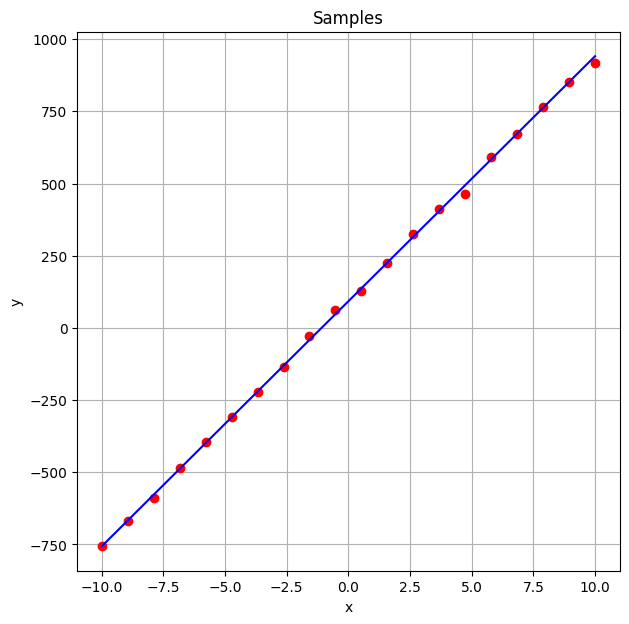

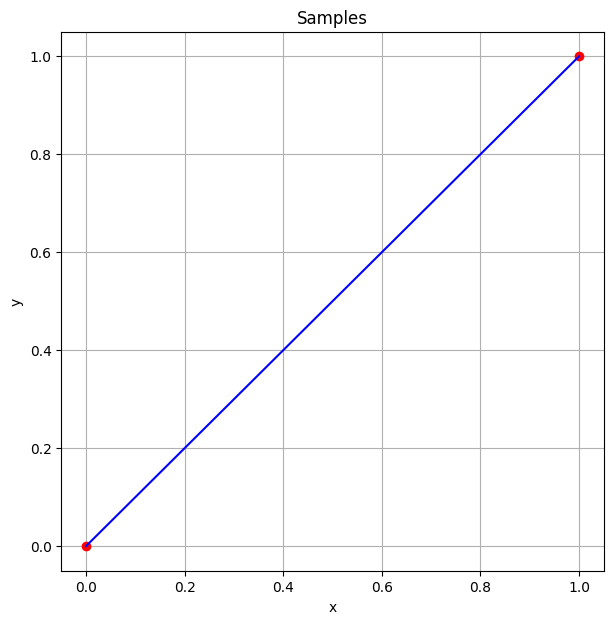

In [53]:
# μπορείτε να χρησιμοποιήσετε την συνάρτηση plot_line() για να σχεδιάσετε
# τα σημεία και την ευθεία που βρίσκει η λύση σας

import matplotlib.pyplot as plt

def plot_line(points, a, b):
    x = [z[0] for z in points]
    y_noisy = [z[1] for z in points]
    y = [a*xx+b for xx in x]

    plt.figure(figsize=(7,7))
    plt.plot(x, y_noisy, 'ro')
    plt.plot(x, y, 'b')
    plt.title('Samples')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

# Για παράδειγμα, τρέχουμε το testcase 1
a, b = fit_line(testcases[1][0])
# και σχεδιάζουμε την ευθεία
plot_line(testcases[1][0], a, b)

# Sanity test
a, b = fit_line([(0,0),(1,1)])

plot_line([(0,0),(1,1)], a, b)

Για την Άσκηση 1, θα χρειαστεί να δημιουργήσετε ένα αρχείο ex1.py το οποίο θα περιέχει την συνάρτηση
fit_line που υλοποιήσατε παραπάνω και θα χρησιμοποιηθεί για τον αυτόματο έλεγχο της λύσης σας.
Προσέξτε κατά την αντιγραφή της συνάρτησης στο αρχείο να προσθέσετε και όποια imports βιβλιοθηκών πιθανώς
έχετε χρησιμοποιήσει.

Μόλις δημιουργήσετε το αρχείο ex1.py, η παρακάτω εντολή ελέγχει την λύση σας πάνω σε όλα τα public testcases.

In [54]:
!python3 evaluate.py --ex1



Testing solver for problem 1

+++ Testcase 0 OK.
+++ Testcase 1 OK.
+++ Testcase 2 OK.
+++ Testcase 3 OK.
+++ Testcase 4 OK.
+++ Testcase 5 OK.
+++ Testcase 6 OK.
+++ Testcase 7 OK.
+++ Testcase 8 OK.
+++ Testcase 9 OK.




### Άσκηση 2 (Εξυπηρέτηση δρομολογίων)

Σε μία εταιρία μεταφορών υπάρχουν καθημερινά διάφορες παραγγελίες που πρέπει να παραδοθούν από τον στόλο των φορτηγών της. Κάθε παραγγελία, λόγω ιδιαιτεροτήτων της, δεν μπορεί να παραδοθεί από όλα τα φορτηγά παρά μόνο από συγκεκριμένα, ενώ κάθε φορτηγό μπορεί να παραδόσει μόνο μία παραγγελία. 

Η είσοδος του προβλήματος είναι δύο αριθμοί $n$ και $m$, ο αριθμός των παραγγελιών και των φορτηγών αντίστοιχα, και μια λίστα με tuples $(i,j)$ τα οποία υποδηλώνουν ότι το φορτηγό $j$ μπορεί να παραδώσει την παραγγελία $i$.

Σας ζητείται να βρείτε μια ανάθεση των παραγγελιών σε φορτηγά, η οποία διευθετεί όσες το δυνατόν περισσότερες παραγγελίες, σεβόμενη τους περιορισμούς συμβατότητας και αναθέτωντας το πολύ μία παραγγελία σε κάθε φορτηγό.



Σε ένα κελί κειμένου περιγράψτε το Integer Program που λύνει το πρόβλημα και στην συνέχεια συμπληρώστε την συνάρτηση assign.

Θεωρούμε πως $X$ είναι το σύνολο των παραγγελιών και $Y$ το σύνολο των φορτηγών αντίστοιχα. Επίσης, ορίζουμε $E$ τη λίστα με tuples  (𝑖,𝑗) και την μετβλητή απόφασης $X_e$, η οποία ισούται με ένα όταν το αντίστοιχο ζευγάρι (i,j) ανήκει στην λύση και μηδέν διαφορετικά.Έτσι, προκύπτει το παρακάτω LP:
\begin{align}
    \text{max} &\quad \sum_{e \in E} X_e \\
    &\\
    \text{subject to} &\quad \sum_{e \in δ(i)} X_e \leq 1   \forall i \in X\\
    &\quad \sum_{e \in δ(j)} X_e \leq 1   \forall j \in Y\\
    &\quad X_e \in \{0,1\} \forall e \in E
\end{align}



In [55]:
'''
Parameters:
  - n: αριθμός παραγγελιών
  - m: αριθμός διαθέσιμων φορτηγών
  - compatibility: λίστα από tuples (x,y) που υποδηλώνουν ότι
    το φορτηγό y μπορεί να παραδώσει την παραγγελία x.
    Θα ισχύει ότι 1 <= x <= n και 1 <= y <= m

Returns:
  - assignment: μια λίστα με tuples (x,y) τα οποία υποδηλώνουν ότι η παραγγελία
    x θα παραδοθεί από το φορτηγό y.

Sample input:
  n = 3
  m = 2
  compatibility = [(1,1), (2,1), (3,1), (2,2), (3,2)]

Sample output:

  [(1,1), (2,2)]

Σημείωση: υπάρχουν και άλλες λύσεις στις οποίες ταξινομούνται 2 παραγγελίες,
π.χ. [(2,1), (3,2)]. Μπορείτε να επιστρέψετε οποιαδήποτε από αυτές θέλετε.
'''
from ortools.linear_solver import pywraplp

def assign(n, m, compatibility):
    
    comp = compatibility
    
    
    # Αρχικοποιούμε τον MIP solver
    solver = pywraplp.Solver.CreateSolver('SCIP')

    
    # Συνολικός αριθμός ζευγαριών
    C = len(comp) 
    X = {}
    Y = {}
    
    
    for i in range(n):
        X[i+1] = []
    for i in range(m):
        Y[i+1] = []   

    
    for i in range(C):
        X[comp[i][0]].append(i)
        Y[comp[i][1]].append(i)
    
    
    edge = {}
    for i in range(C):
        # Η εντολή αυτή φτιάχνει μια νέα ακέραια μεταβλητή
        # με όρια το 0 και το 1 καθώς κάθε φορτηγό μπορεί να παραδόσει 
        # το πολύ μία παραγγελία 
        edge[i] = solver.IntVar(0, 1, f'e_{i}')


    for j in range(n):
        # Για να αθροίσουμε ένα μη-σταθερό πλήθος μεταβλητών
        # μπορούμε να βάλουμε τις μεταβλητές σε μια λίστα
        # και να τις δώσουμε στην solver.Sum()
        solver.Add( solver.Sum([ edge[i] for i in X[j+1] ]) <= 1 )
        
    for j in range(m):
        solver.Add( solver.Sum([ edge[i] for i in Y[j+1] ]) <= 1 )

    # Objective Function
    solver.Maximize(solver.Sum([edge[i] for i in range(C)]))

    # Τέλος, καλούμε την solve
    status = solver.Solve()


    res = [] 
    if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
        res = [i for i in range(C) if edge[i].solution_value() > 0]
        
    result = [comp[i] for i in res]
    
    return result

Αντίστοιχα με την Άσκηση 1, δημιουργήστε ένα αρχείο ex2.py και μεταφέρετε εκεί την συνάρτηση assign
μαζί με πιθανά imports βιβλιοθηκών. Χρησιμοποιείστε την επόμενη εντολή για να ελέγξετε την λύση σας.

In [56]:
!python3 evaluate.py --ex2



Testing solver for problem 2

+++ Testcase 0 OK.
+++ Testcase 1 OK.
+++ Testcase 2 OK.
+++ Testcase 3 OK.
+++ Testcase 4 OK.
+++ Testcase 5 OK.
+++ Testcase 6 OK.
+++ Testcase 7 OK.
+++ Testcase 8 OK.
+++ Testcase 9 OK.




## Παραδοτέα

Για την Άσκηση 1
 * Σε ένα κελί κειμένου περιγράψτε το Linear Program που λύνει την άσκηση
 * Υλοποιήστε το linear program χρησιμοποιώντας τα or-tools στην συνάρτηση fit_line
 * Τρέξτε διάφορα sanity checks. Για παράδειγμα αν δώσετε στην λύση σας μόνο δύο σημεία, τότε το αποτέλεσμα θα πρέπει να είναι η ευθεία που περνά από αυτά τα σημεία και το συνολικό σφάλμα θα είναι 0. Μπορείτε ακόμα να σχεδιάσετε την λύση σας για διάφορα testcases για να δείτε αν όντως κάνει fit στα δεδομένα.
 
 * Μεταφέρετε την fit_line στο αρχείο ex1.py και τρέξτε το evalute.py με παράμετρο --ex1 για να δείτε ότι περνάτε επιτυχώς όλα τα public testcases

Για την Άσκηση 2
 * Σε ένα κελί κειμένου περιγράψτε το Integer Program που λύνει την άσκηση
 * Υλοποιήστε το integer program χρησιμοποιώντας τα or-tools στην συνάρτηση assign
 * Τρέξτε το sample testcase.
 * Μεταφέρετε την assign στο αρχείο ex2.py και τρέξτε το evalute.py με παράμετρο --ex2 για να δείτε ότι περνάτε επιτυχώς όλα τα public testcases

Παραδοτέα

 * Αποθηκεύστε το παρόν notebook σαν html αρχείο (File --> Download as --> HTML) και φροντίστε να έχετε τρέξει όλα τα κελιά ώστε να φαίνονται τα αποτελέσματα.
 * Θα παραδόσετε ένα αρχείο .zip που θα περιέχει το notebook σαν html αρχείο και τα δύο python scripts που δημιουργήσατε (ex1.py, ex2.py)